# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000,15.000,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.000,6
3,4,Female,23.000,16.000,77
4,5,Female,31.000,17.000,40


Датасет Mall_Customers содержит данные по покупателям сети супермаркетов.
Он содердит следующие столбцы:

- CustomerID: идентификатор покупателя
- Genre: пол покупателя
- Age: возраст покупателя
- Annual Income (kгодовойдоходпокупателятысяч
- Spending Score (1–100): рейтинг покупателя, целевая переменная

In [90]:
# В названии столбца скорее всего опечатка
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [92]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000,15.000,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.000,6
3,4,Female,23.000,16.000,77
4,5,Female,31.000,17.000,40
...,...,...,...,...,...
195,196,Female,35.000,120.000,79
196,197,Female,45.000,126.000,28
197,198,Male,32.000,126.000,74
198,199,Male,NaN,137.000,18


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,180.000,39.894,16.843,18.000,29.000,36.000,49.000,135.000
Annual Income (k$),180.000,"5,615.433","74,531.116",15.000,42.000,61.000,78.000,"1,000,000.000"
Spending Score (1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [94]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
5,6,Female,22.000,17.000,76
58,59,Female,27.000,46.000,51
136,137,Female,44.000,73.000,7
149,150,Male,34.000,78.000,90
159,160,Female,30.000,78.000,73
29,30,Female,23.000,29.000,87
195,196,Female,35.000,120.000,79


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

Проверяем и удаляем дубликаты только в CustomerID (см обсуждение семинар timing 1:00:00)

In [95]:
duplicates = df[df.duplicated(subset='CustomerID')]
print("Дубликаты по CustomerID:")
print(duplicates)

Дубликаты по CustomerID:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


В столбце CustomerID нет дубликатов, и DataFrame уже очищен от любых повторений по этому столбцу, поэтому в дальнейшем дубликаты не ищем и не удаляем, чтобы не исказить модель.

In [96]:
# Проверка количества пропусков в каждом признаке
missing_values = df.isnull().sum()
print("Количество пропусков в каждом признаке:")
print(missing_values)

Количество пропусков в каждом признаке:
CustomerID                 0
Gender                    19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


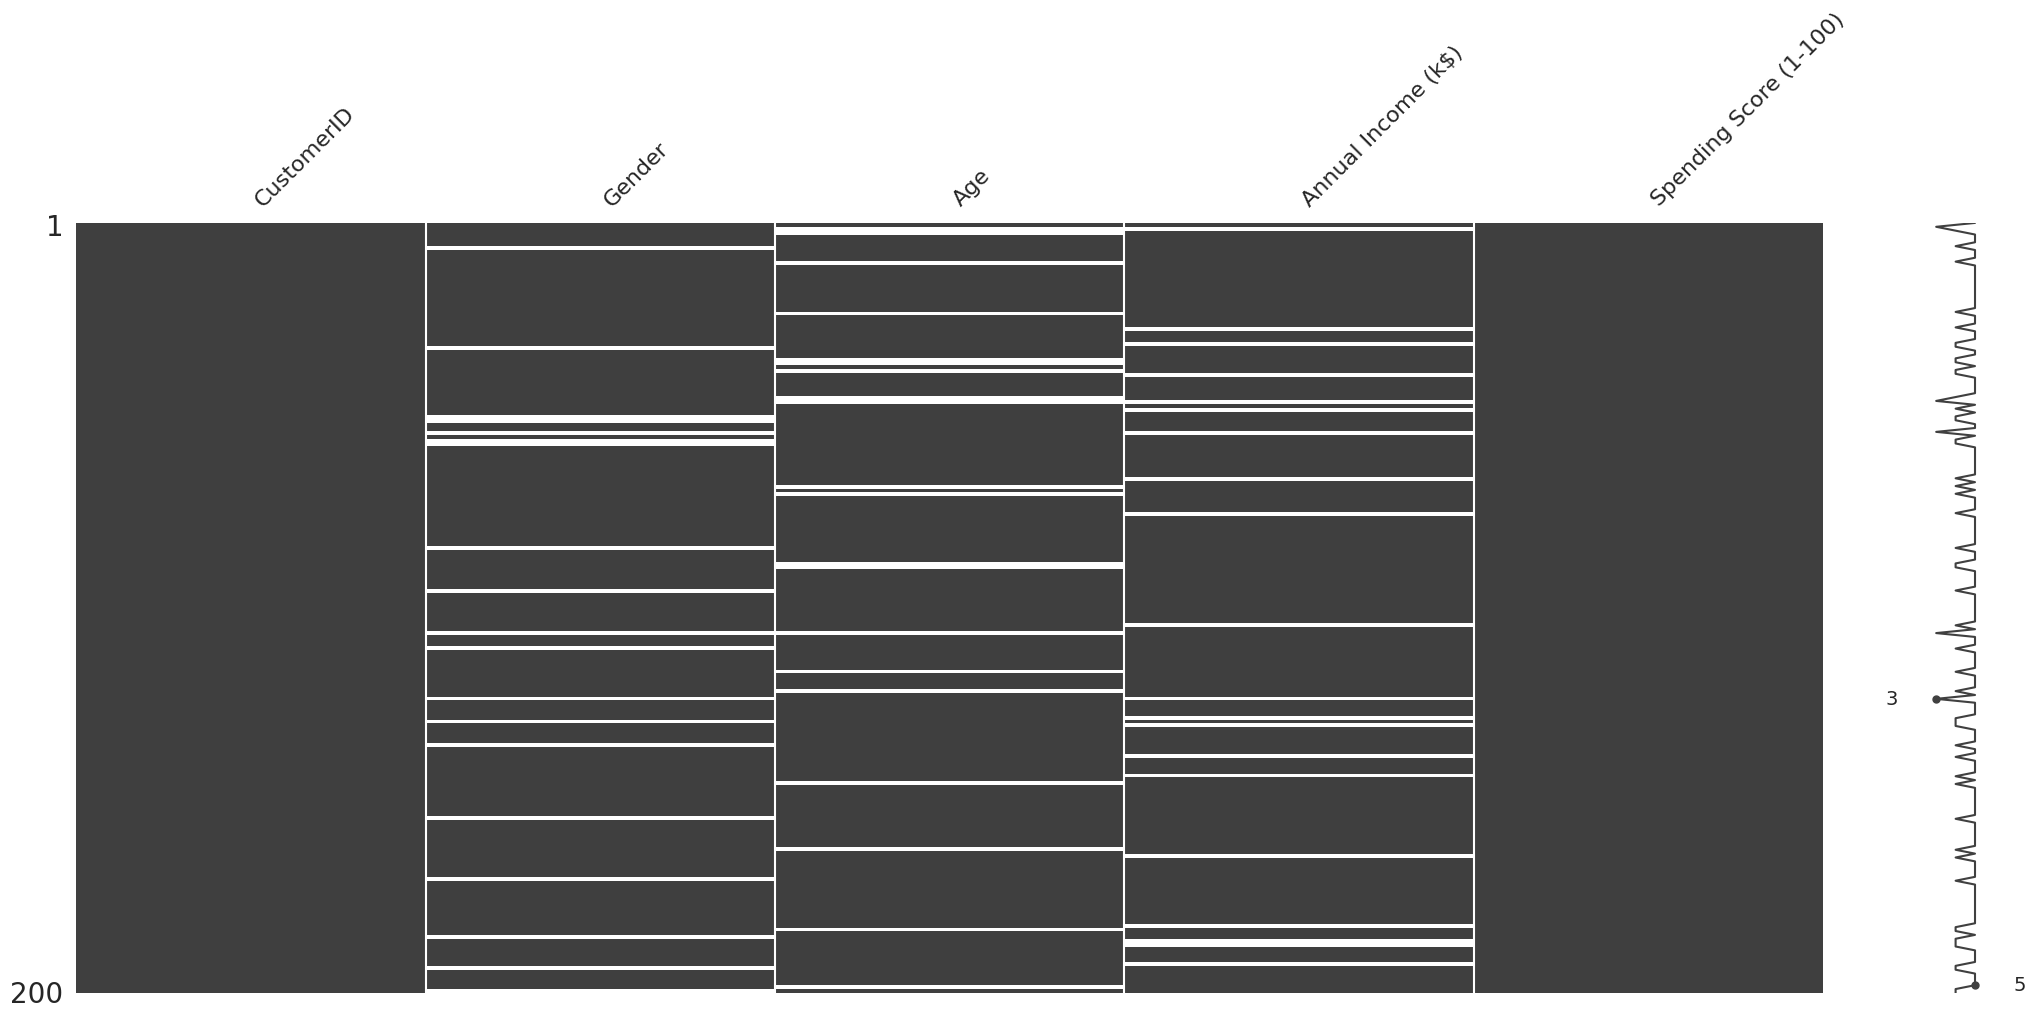

In [97]:
#Проверка на наличие пропусков
import missingno as msno

msno.matrix(df);  # Матрица пропусков

In [98]:
# Удаляем столбец 'CustomerID'
df = df.drop('CustomerID', axis=1)

# Проверка, что столбец удален
print(df.head())

   Gender    Age  Annual Income (k$)  Spending Score (1-100)
0    Male 19.000              15.000                      39
1    Male    NaN                 NaN                      81
2  Female    NaN              16.000                       6
3  Female 23.000              16.000                      77
4  Female 31.000              17.000                      40


In [99]:
# Предварительная проверка уникальных значений в каждом столбце
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Уникальные значения в столбце Gender: ['Male' 'Female' nan 'Feemale']
Уникальные значения в столбце Age: [ 19.  nan  23.  31.  22. 135.  30.  35.  58.  24.  37.  20.  52.  25.
  46.  54.  29.  45.  40.  60.  21.  53.  18.  49.  65.  48.  27.  33.
  59.  50.  47.  51.  69.  70.  67.  63.  43.  68.  32.  26.  57.  38.
  55.  66.  39.  44.  28.  34.  56.  36.  42.  41.]
Уникальные значения в столбце Annual Income (k$): [1.50e+01      nan 1.60e+01 1.70e+01 1.80e+01 1.90e+01 2.00e+01 2.10e+01
 2.30e+01 2.40e+01 2.50e+01 2.80e+01 2.90e+01 3.00e+01 3.30e+01 3.40e+01
 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.20e+01 4.30e+01 4.40e+01 4.60e+01
 4.70e+01 4.80e+01 4.90e+01 5.00e+01 5.40e+01 5.70e+01 5.80e+01 5.90e+01
 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.70e+01 6.90e+01
 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01 7.50e+01 7.60e+01 7.70e+01
 7.80e+01 1.00e+06 7.90e+01 8.10e+01 8.50e+01 8.60e+01 8.70e+01 8.80e+01
 9.30e+01 9.70e+01 9.80e+01 9.90e+01 1.03e+02 1.13e+02 1.20e+02 1.26e

In [100]:
# Сразу преобразуем все аномальные значения
df['Gender'] = df['Gender'].replace({'Feemale': 'Female'})  # Исправление опечатки

# Вычисление моды для столбца "Gender"
mode_value = df['Gender'].mode()[0]


# Замена NaN на значение с использованием моды
df['Gender'].fillna(mode_value, inplace=True)  # Замена пропусков на 'Unknown'

<ipython-input-100-4c2d0d4072d6>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_value, inplace=True)  # Замена пропусков на 'Unknown'


In [101]:
df['Gender'].value_counts()

,count
Gender,
Female,123
Male,77


In [102]:
# Установить формат отображения чисел
pd.options.display.float_format = '{:,.3f}'.format
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)
print(df['Annual Income (k$)'].head())

0   15.000
1      NaN
2   16.000
3   16.000
4   17.000
Name: Annual Income (k$), dtype: float64


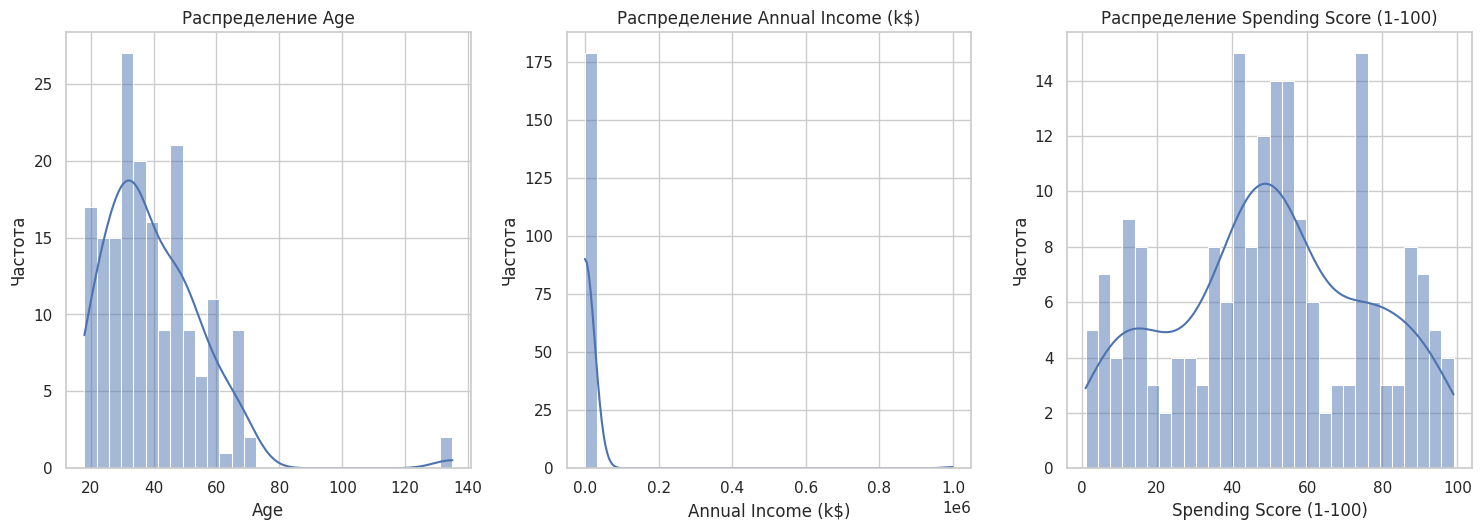

In [103]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Age — график имеет резкое коолонообразное начало с лева и длинный хвост в право, что говорит о большом количестве клиетов в молодом возрасте. Пик клиентов приходится на возраст от 25 до 36 лет, затем происходит плавный спад выраженый выбросом в 135 лет, что срее всего просто опечатка и единица что следует из графика явно лишняя, скорее всего клиенты в выбросе имеют возраст около 35 лет.

Annual Income (k$) — доход имеет явный пик с небольшим выбросом в конце. Это говорит о том, что лишь очень небольшое количество граждан имеет высокий доход, остальные обладают средним доходом.

Spending Score (1-100) - Данные распределены более менее равномерно диаграма имеет два пика, что говорит нам о том, что есть две группы клиетов которые хорошо тратят свои деньги. В первом пике от 5 до 15 находятся первая группа клиентов которая не смотря на небольшое количество балов, затем идёт второй пик клиентов от 40 до 60 балов которые больше всего совершают покупок, затем идёт низподающая в право. Из этого можно сделать вывод, что часть клиентов у которых, есть первые накопления стараются как можно быстрее потратить свои балы, поскольку не так часто покупает, что либо, основная часть клиентов старается накопить побольше балов перед покупкой, и оставшиеся часть долго копит балы и совершает покупки лишь когда есть возможность ощутимой скидки это видно на спадающем пике где колона покупок в районе от 77 до 78 так же высока как на максимальном пике.

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [104]:
from sklearn.model_selection import train_test_split
# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Spending Score (1-100)']) # Cоздаем новую переменную X, которая содержит все столбцы из датафрейма df, кроме столбца 'Spending Score (1-100)'
y = df['Spending Score (1-100)']

# Разделение данных на обучающую и тестовую выборки (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Проверка форматов данных
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (160, 3)
Размер тестовой выборки: (40, 3)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [110]:
# Заполнение пропусков в 'Genre' с использованием моды
genre_median = SimpleImputer(strategy='most_frequent')
X_train['Gender'] = genre_median.fit_transform(X_train['Gender'].values.reshape(-1, 1)).ravel()

# Заполнение пропусков в 'Age' и 'Annual Income (k$)' с использованием медианы
other_median = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = other_median.fit_transform(X_train[['Age', 'Annual Income (k$)']])

# Проверка результата
print(X_train.isnull().sum())

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


Gender - поскольку это категорианальный признак, заполнение модой позволит сохранить наиболее часто врстречающееся значение.

Age и Anual Income (k$) - Средние значние может быть чувствительно к выбросам которые наблюдаются в обоих колонках, по этому лучше использовать медиану, которая более устойчива к аномалиям.

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


На графике описания данных видно, что существует аномальный выброс: возраст больше 120 лет.  Возможно произвести замену на моду или медиану или на среднее значение.
 Выбор метода обнаружения выбросов: Мы используем метод IQR, который основан на межквартильном диапазоне. Выбросы определяются как значения, выходящие за пределы 1.5 * IQR ниже первого квартиля (Q1) и выше третьего квартиля (Q3).

Обработка выбросов:  выбросы можно заменить на границы (либо Q1 - 1.5 * IQR, либо Q3 + 1.5 * IQR).

In [111]:
def replace_outliers_with_median(X_train, column):
    # Вычисление Q1 и Q3
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Замена выбросов на медиану
    median_value = X_train[column].median()
    X_train[column] = np.where((X_train[column] < lower_bound) | (X_train[column] > upper_bound), median_value, X_train[column])

    # Подсчет выбросов
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    return outliers.shape[0]

# Применение функции к каждому столбцу
for col in ['Age', 'Annual Income (k$)']:
    replace_outliers_with_median(X_train, col)

In [112]:
age_outliers = replace_outliers_with_median(X_train, 'Age')
print(f"Количество выбросов в столбце 'Age': {age_outliers}")

annual_outliers = replace_outliers_with_median(X_train, 'Annual Income (k$)')
print(f"Количество выбросов в столбце 'Annual Income (k$)': {annual_outliers}")

Количество выбросов в столбце 'Age': 0
Количество выбросов в столбце 'Annual Income (k$)': 0


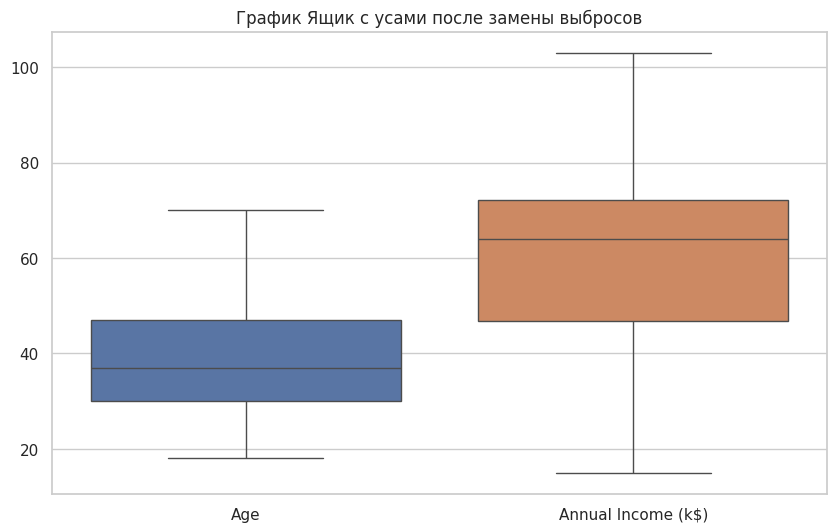

In [113]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[['Age', 'Annual Income (k$)']])
plt.title("График Ящик с усами после замены выбросов")
plt.show()

Для поиска выбросов в признаках обучающей выборки можно использовать межквартильного диапазона (IQR). Этот метод позволяет выявить выбросы, основываясь на распределении данных.

Медиана позволяет избежать сильных искажений данных при замене выбросов.

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [114]:
# Функция для Z-нормализации
def z_normalize(column):
    return (column - column.mean()) / column.std()

# Функция для Мини-Max нормализации
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Нормализация признака Age (Z-нормализация)
X_train['Age'] = z_normalize(X_train['Age'])

# Нормализация признака Annual Income (k$) (Мини-Max нормализация)
X_train['Annual Income (k$)'] = min_max_normalize(X_train['Annual Income (k$)'])

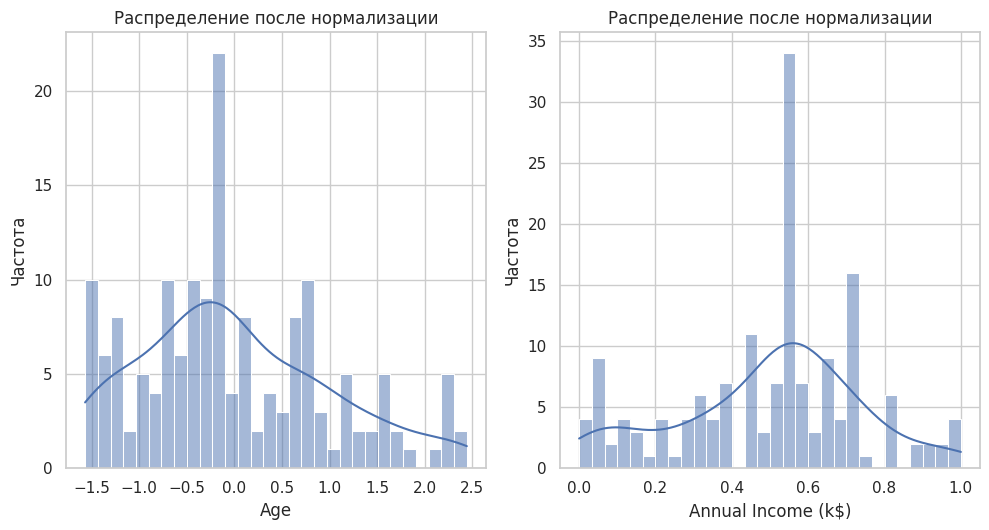

In [115]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['Age', 'Annual Income (k$)']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_train[column], kde=True, bins=30)
    plt.title(f'Распределение после нормализации')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Age - может иметь нормальное распределение, и важно учитывать выбросы. Z-нормализация позволит лучше обработать такие случаи, сохраняя информацию о вариации.

Annual Income (k$) - может иметь сильные выбросы (например, очень высокие доходы), что делает Z-нормализацию менее эффективной, так как она может быть сильно искажена. Мини-Max нормализация позволит поместить все значения в диапазон [0, 1], что может быть полезно для некоторых алгоритмов, таких как нейронные сети.

После выполнения кода получим нормализованные значения для признаков Age и Annual Income (k$). Это поможет улучшить результаты обучения моделей, так как алгоритмы машинного обучения часто чувствительны к масштабу признаков.

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [116]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [117]:
# Создаем LabelEncoder
label_encoder = LabelEncoder()

# Кодируем колонку 'Genre'
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])

# Выводим закодированные значения и соответствие
print("Закодированные значения:")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original} -> {encoded}")

Закодированные значения:
Female -> 0
Male -> 1


In [118]:
# Проверка уникальных значений в Gender
print(df['Gender'].unique())

# Проверка значений в Age и Annual Income
print(df[['Age', 'Annual Income (k$)']].describe())

['Male' 'Female']
          Age  Annual Income (k$)
count 180.000             180.000
mean   39.894           5,615.433
std    16.843          74,531.116
min    18.000              15.000
25%    29.000              42.000
50%    36.000              61.000
75%    49.000              78.000
max   135.000       1,000,000.000


In [119]:
# Проверка результата
print(X_train[['Gender', 'Age', 'Annual Income (k$)']].head())
X_train.dtypes

     Gender    Age  Annual Income (k$)
108       1  2.288               0.545
107       1  1.208               0.545
189       0 -0.180               1.000
14        1 -0.103               0.057
56        0  0.977               0.330


,0
Gender,int64
Age,float64
Annual Income (k$),float64


<ipython-input-121-4455bfdcc23c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=X_train, order=X_train['Gender'].value_counts().index[::-1], palette='Set2')


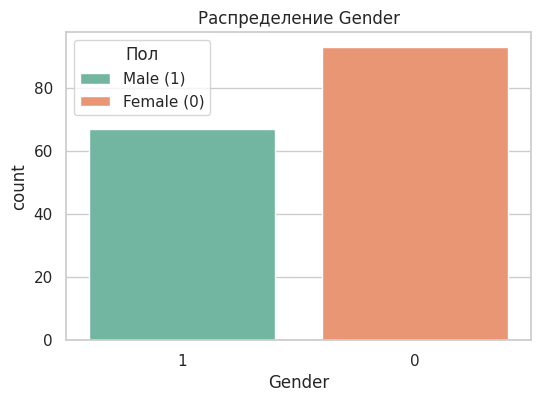

In [121]:
# Проверка баланса категориональных признаков
plt.figure(figsize=(6, 4))

# Инвертируем порядок категорий и задаем цвета
sns.countplot(x='Gender', data=X_train, order=X_train['Gender'].value_counts().index[::-1], palette='Set2')
plt.title("Распределение Gender")

# Добавляем легенду
plt.legend(title='Пол', labels=['Male (1)', 'Female (0)'])
plt.show()

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [122]:
# Проверка на пропущенные NaN значения
print(X_test.isnull().sum())

Gender                0
Age                   5
Annual Income (k$)    2
dtype: int64


In [123]:
# 1. Замена пропущенных значений

# Заполнение пропущенных значений средними значениями для числовых признаков
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Annual Income (k$)'] = X_test['Annual Income (k$)'].fillna(X_test['Annual Income (k$)'].mean())

In [124]:
# 2. Нахождение и замена выбросов

# Определение нижней и верхней границ выбросов для возраста
lower_bound_age = X_test['Age'].quantile(0.05)  # 5-й процентиль
upper_bound_age = X_test['Age'].quantile(0.95)  # 95-й процентиль

# Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
X_test.loc[X_test['Age'] < lower_bound_age, 'Age'] = lower_bound_age
X_test.loc[X_test['Age'] > upper_bound_age, 'Age'] = upper_bound_age

# Определение верхней границы выбросов для годового дохода
income_upper_limit = X_test['Annual Income (k$)'].quantile(0.95)

# Замена значений выше 95-го процентиля на это значение
X_test.loc[X_test['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit

# Проверка результатов
print(X_test[['Age', 'Annual Income (k$)']].describe())

         Age  Annual Income (k$)
count 40.000              40.000
mean  40.219              60.585
std   11.853              27.170
min   23.950              17.000
25%   31.750              38.750
50%   39.000              60.000
75%   49.000              85.500
max   65.000             113.350


In [125]:
# 3. Нормализация численных признаков

# Создаем StandardScaler
scaler = StandardScaler()

# Применяем масштабирование только к числовым признакам
X_test[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_test[['Age', 'Annual Income (k$)']])

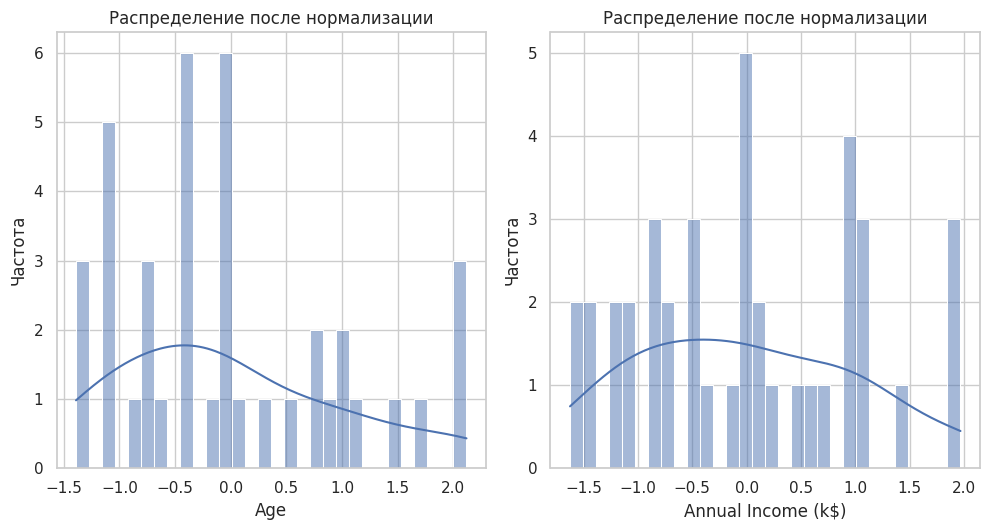

In [126]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['Age', 'Annual Income (k$)']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_test[column], kde=True, bins=30)
    plt.title(f'Распределение после нормализации')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [127]:
# 4. Кодирование категориальных признаков

# One-Hot Encoding для гендерного признака
encoded_genre = pd.get_dummies(X_test['Gender'], prefix='Gender', drop_first=True)

# Заменяем оригинальный столбец 'Genre' закодированным значением
X_test['Gender'] = encoded_genre

In [129]:
X_test['Gender'].value_counts()

,count
Gender,
False,30
True,10
